# Heuristics for finding clusters

In [1]:
from ModifiedGraph import Graph
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
from pathlib import Path

DATA_PATH = Path('data/iris.data')
NAMES = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
DISTANCE_METRIC = 'euclidean'
REMOVE_OUTLIERS = False
KEEP_UNDER_PERCENTILE = 75
N_CLUSTERS = 3

Load data:

In [2]:
df = pd.read_csv(DATA_PATH, names=NAMES)

X = df.select_dtypes(include=np.number).to_numpy()
y = df['class'].to_numpy()

D = pairwise_distances(X, metric=DISTANCE_METRIC)

if REMOVE_OUTLIERS:
    points_mean_distance = []
    means = []
    for i, point in enumerate(D):
        points_mean_distance.append( (i , np.mean(D[i])))
        means.append(np.mean(D[i]))

    threshold = np.percentile(means, KEEP_UNDER_PERCENTILE)
    points = []
    for i, distance in points_mean_distance:
        if distance > threshold:
            points.append(i)

    X = np.delete(X, points, axis=0)
    y = np.delete(y, points, axis=0)

Apply PCA to the data for visualization purposes:

In [3]:
pca = PCA(2)
X_PCA = pca.fit_transform(X)
D_PCA = pairwise_distances(X_PCA, metric=DISTANCE_METRIC)

df_pca = pd.DataFrame(X_PCA, columns=['PC1', 'PC2'])
df_pca.insert(2, 'Class', y)
data = df_pca.reset_index()

Function to visualize MST on transformed data (PCA):

In [4]:
def plot_mst(data, mst, x, y, hue, text_column=None, title='PCA - MST', xlabel='D1', ylabel='D2'):
    data = data.copy()
    # Create the scatter plot
    p = sns.scatterplot(data=data, x=x, y=y, hue=hue, size = 8, legend=False)
    # Add text besides each point
    if text_column:
        for line in range(0,data.shape[0]):
            p.text(data[x][line]+0.01, data[y][line], 
                    data[text_column][line], horizontalalignment='left', 
                    size='small', color='black')
    # Add edges from mst
    for edge in mst:
        u, v, w = edge()
        xuv = [data.iloc[u.id][x], data.iloc[v.id][x]]
        yuv = [data.iloc[u.id][y], data.iloc[v.id][y]]
        sns.lineplot(x=xuv, y=yuv, color='grey', ls='--', size=0.001, ax=p, legend=False)
    # Set title and axis labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return p

Build Graph from D:

In [5]:
G = Graph()
G.build_from_distance_matrix(D)
G_PCA = Graph()
G_PCA.build_from_distance_matrix(D)

#### Kruskal's Algorithm without PCA

<AxesSubplot: title={'center': 'MST (Kruskal, D) - PCA'}, xlabel='PC1', ylabel='PC2'>

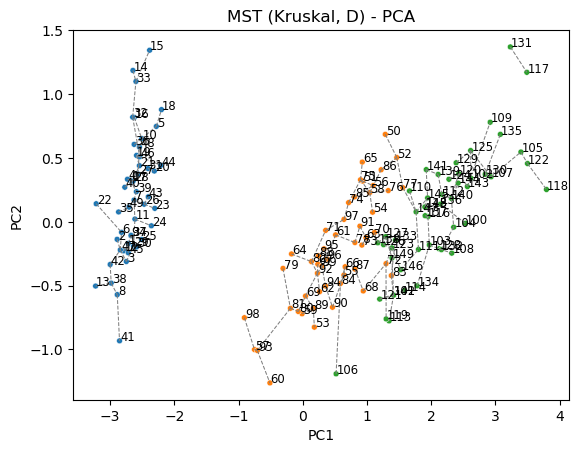

In [6]:
G.kruskal_alg()
cut_mst = G.cut_k_edges_from_mst(N_CLUSTERS-1, G.kruskal_mst)
A = G.get_adjacency_matrix(cut_mst)
comp, classes = G.get_connected_components(A)

plot_mst(data, cut_mst, 'PC1', 'PC2', 'Class', 'index', 'MST (Kruskal, D) - PCA', 'PC1', 'PC2')

#### Prim's Algorithm without PCA

<AxesSubplot: title={'center': 'MST (Prim, D) - PCA'}, xlabel='PC1', ylabel='PC2'>

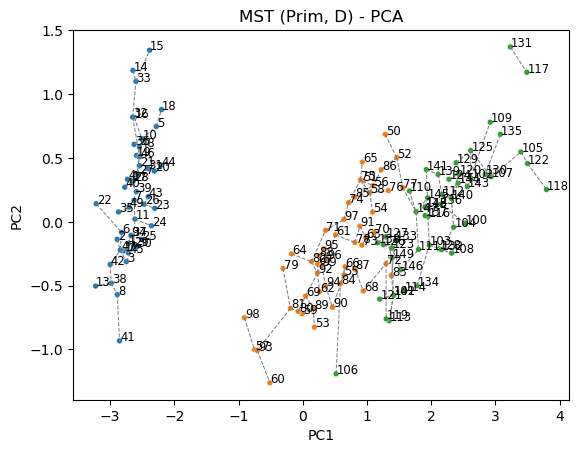

In [7]:
G.prim_alg()
cut_mst = G.cut_k_edges_from_mst(N_CLUSTERS-1, G.prim_mst)
A = G.get_adjacency_matrix(cut_mst)
comp, classes = G.get_connected_components(A)

plot_mst(data, cut_mst, 'PC1', 'PC2', 'Class', 'index', 'MST (Prim, D) - PCA', 'PC1', 'PC2')

#### Kruskal's Algorithm with previous PCA

<AxesSubplot: title={'center': 'MST (Kruskal, D_PCA) - PCA'}, xlabel='PC1', ylabel='PC2'>

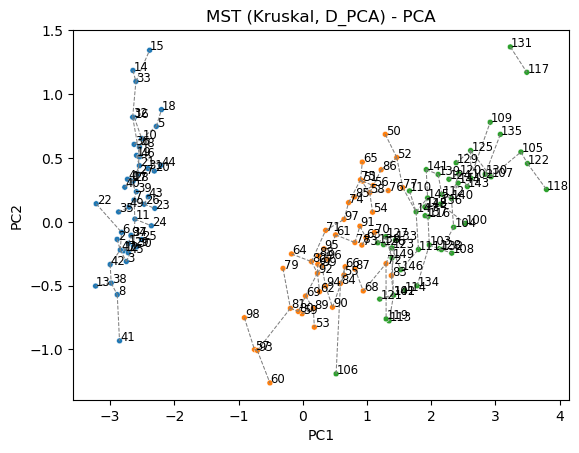

In [8]:
G_PCA.kruskal_alg()
cut_mst = G.cut_k_edges_from_mst(N_CLUSTERS-1, G_PCA.kruskal_mst)
A = G_PCA.get_adjacency_matrix(cut_mst)
comp, classes = G_PCA.get_connected_components(A)

plot_mst(data, cut_mst, 'PC1', 'PC2', 'Class', 'index', 'MST (Kruskal, D_PCA) - PCA', 'PC1', 'PC2')

#### Prim's Algorithm with previous PCA

<AxesSubplot: title={'center': 'MST (Prim, D_PCA) - PCA'}, xlabel='PC1', ylabel='PC2'>

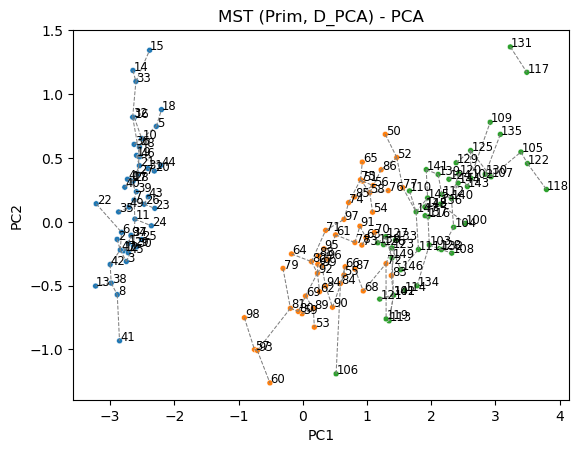

In [9]:
G.prim_alg()
cut_mst = G.cut_k_edges_from_mst(N_CLUSTERS-1, G.prim_mst)
A = G.get_adjacency_matrix(cut_mst)
comp, classes = G.get_connected_components(A)

plot_mst(data, cut_mst, 'PC1', 'PC2', 'Class', 'index', 'MST (Prim, D_PCA) - PCA', 'PC1', 'PC2')